The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [10]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Start coding here!

In [11]:
nobelpw = pd.read_csv("data/nobel.csv")
print(nobelpw.head(3))

nobelpw.columns

   year    category  ... death_city death_country
0  1901   Chemistry  ...     Berlin       Germany
1  1901  Literature  ...   Châtenay        France
2  1901    Medicine  ...    Marburg       Germany

[3 rows x 18 columns]


Index(['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country'],
      dtype='object')

For commonly awarded Gender and Country, amongst the Nobel prize winners :

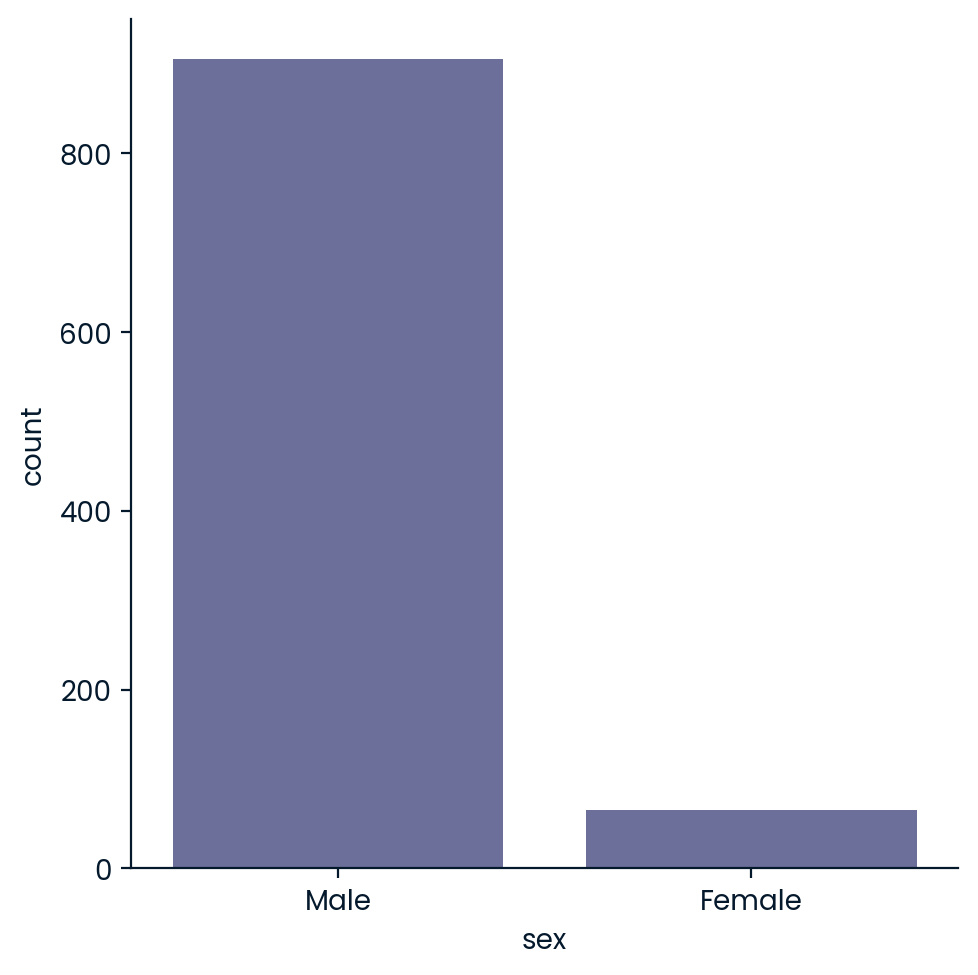

In [12]:
sns.catplot(x="sex",
           kind="count",
           data=nobelpw)

plt.show()

In [13]:
top_gender="Male"
plt.clf()

<Figure size 640x480 with 0 Axes>

In [14]:
countriesnbpw = nobelpw["birth_country"].value_counts()
countriesnbpw_df = countriesnbpw.reset_index()
countriesnbpw_df.columns = ['country', 'count']

top_country = countriesnbpw_df['country'][0]

top_country

'United States of America'

Now let us explore which decade has the highest US-born Nobel Prize Winners 

In [15]:
nobelpw["decade"]= ((np.floor(nobelpw["year"]/10)) * 10).astype(int)
USAnobelpw=nobelpw[nobelpw["birth_country"] == top_country]


decadesofUSA = USAnobelpw["decade"].value_counts()
decadesofUSA_df = decadesofUSA.reset_index()
decadesofUSA_df.columns = ['decade','count']

max_decade_usa = int(decadesofUSA_df['decade'][0])

max_decade_usa

2000

Which decade and Nobel Prize category combination had the highest proportion of female laureates, let us explore

In [16]:
female_counts = nobelpw[nobelpw['sex'] == 'Female'].groupby(['decade', 'category']).size()
total_counts = nobelpw.groupby(['decade', 'category']).size()
proportion_female = (female_counts / total_counts).fillna(0)


max_idx = proportion_female.idxmax()
max_female_dict = {int(max_idx[0]): max_idx[1]}
max_female_dict

{2020: 'Literature'}

lets see the first women to recieve the nobel prize, her name and her category

In [17]:
women_details = nobelpw[nobelpw['sex'] == 'Female']
women_details_sorted = women_details.sort_values('year').reset_index(drop=True)

first_woman_name = women_details_sorted["full_name"][0]
first_woman_category = women_details_sorted["category"][0]

Which individuals or organizations have won more than one Nobel Prize throughout the years?

In [18]:
list_of_winners = nobelpw["full_name"].value_counts().reset_index()
list_of_winners.columns = ["Name","Times"]

repeat_list = list_of_winners[list_of_winners["Times"] > 1 ]
repeat_list = list(repeat_list["Name"])

repeat_list

['Comité international de la Croix Rouge (International Committee of the Red Cross)',
 'Linus Carl Pauling',
 'John Bardeen',
 'Frederick Sanger',
 'Marie Curie, née Sklodowska',
 'Office of the United Nations High Commissioner for Refugees (UNHCR)']